**登录colab读取**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


定义主目录

In [2]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
!pip install omegaconf wandb hydra-core -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


登录wandb获取密码和输出

In [8]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


run 结合主目录地址下的文件位置

/content/drive/MyDrive/MDD/config/config-optuna.yaml 保存的超参数等设置

/content/drive/MyDrive/MDD/src/dataset.py 更改数据集位置

/content/drive/MyDrive/MDD/src/net.py 更改网络参数

In [9]:
!python MDD/src/CNNRUN.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/MDD/src/CNNRUN.py", line 136, in <module>
    main()
  File "/usr/local/lib/python3.10/dist-packages/hydra/main.py", line 94, in decorated_main
    _run_hydra(
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/utils.py", line 394, in _run_hydra
    _run_app(
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/utils.py", line 457, in _run_app
    run_and_report(
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/utils.py", line 220, in run_and_report
    return func()
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/utils.py", line 458, in <lambda>
    lambda: hydra.run(
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/hydra.py", line 119, in run
    ret = run_job(
  File "/usr/local/lib/python3.10/dist-packages/hydra/core/utils.py", line 186, in run_job
    ret.return_value = task_function(task_cfg)
  File "/content/drive/MyDrive/MDD/src/CNNRUN.py", lin

下载必要程序（hydra加速）

In [4]:
!pip install -U hydra_optuna_sweeper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 14.3 MB/s eta 0:00:00


**OnOff更改项：net中的frontconv中的output形状和x，perform中的L2正则化，utils中的reshape**

In [ ]:
import subprocess
from tqdm import tqdm

num_runs = 5

# 创建一个tqdm进度条对象
progress_bar = tqdm(total=num_runs, desc='Running')

# 循环运行 train.py 脚本
for _ in range(num_runs):
    # 运行 train.py 脚本
    subprocess.run(["python", "MDD/src/CNNRUN.py"])
    # 更新进度条
    progress_bar.update(1)

# 关闭进度条
progress_bar.close()



Running:  90%|█████████ | 9/10 [1:07:38<07:30, 450.95s/it]

Running:  80%|████████  | 4/5 [25:45<06:27, 387.46s/it]

In [ ]:
!python MDD/src/train.py

Error executing job with overrides: []
Traceback (most recent call last):
  File "_mt19937.pyx", line 178, in numpy.random._mt19937.MT19937._legacy_seeding
TypeError: 'str' object cannot be interpreted as an integer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/drive/MyDrive/ODGS/src/train.py", line 61, in main
    seed_everything(seed=cfg.seed)
  File "/content/drive/MyDrive/ODGS/src/train.py", line 39, in seed_everything
    np.random.seed(seed)
  File "mtrand.pyx", line 246, in numpy.random.mtrand.RandomState.seed
  File "_mt19937.pyx", line 166, in numpy.random._mt19937.MT19937._legacy_seeding
  File "_mt19937.pyx", line 186, in numpy.random._mt19937.MT19937._legacy_seeding
TypeError: Cannot cast scalar from dtype('<U22') to dtype('int64') according to the rule 'safe'

Set the environment variable HYDRA_FULL_ERROR=1 for a complete stack trace.


/content/drive/MyDrive/MDD/src/CNNRUN.py \\
77行修改类型 \\
55行修改名字


In [9]:
import subprocess
import yaml
import numpy as np
from tqdm import tqdm

num_runs = 5

# 创建一个tqdm进度条对象
progress_bar = tqdm(total=num_runs, desc='Running')

# 循环运行 train.py 脚本
for _ in range(num_runs):
    # 生成随机的 seed 值
    seed = np.random.randint(0, 100)

    # 读取配置文件
    with open('ODGS/config/config-optuna.yaml', 'r') as file:
        config = yaml.safe_load(file)
        config['seed'] = seed

    # 保存更新后的配置文件
    with open('ODGS/config/config-optuna.yaml', 'w') as file:
        yaml.dump(config, file)

    # 打印当前使用的 seed
    print("Current seed:", seed)

    # 运行 train.py 脚本
    subprocess.run(["python", "MDD/src/CNNRUN.py"])

    # 更新进度条
    progress_bar.update(1)

# 关闭进度条
progress_bar.close()

Running:   0%|          | 0/5 [00:00<?, ?it/s]

Current seed: 89


Running:  20%|██        | 1/5 [04:43<18:52, 283.15s/it]

Current seed: 33


Running:  40%|████      | 2/5 [09:33<14:21, 287.20s/it]

Current seed: 16


Running:  60%|██████    | 3/5 [13:55<09:11, 275.61s/it]

Current seed: 13


Running:  80%|████████  | 4/5 [18:11<04:28, 268.01s/it]

Current seed: 95


Running: 100%|██████████| 5/5 [22:37<00:00, 271.58s/it]


In [5]:
!pip install efficientnet-pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=0e8a73d1caf0c929123ea17e089fd5f773a837124857d61e2aead9c9e4c35c25
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch


In [ ]:
!python ODGS/src/EfNB0torch.py

wandb: Currently logged in as: ruriiiii. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.4
wandb: Run data is saved locally in /content/drive/MyDrive/wandb/run-20230629_005315-nzdexs2p
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run lively-breeze-20
wandb: ⭐️ View project at https://wandb.ai/ruriiiii/EfN-B0
wandb: 🚀 View run at https://wandb.ai/ruriiiii/EfN-B0/runs/nzdexs2p
Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100% 20.4M/20.4M [00:00<00:00, 56.2MB/s]
Loaded pretrained weights for efficientnet-b0
4012672
CrossEntropy
  0% 0/150 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` be

原始数据形状： (60000, 28, 28)
填充后数据形状： (60000, 32, 32)


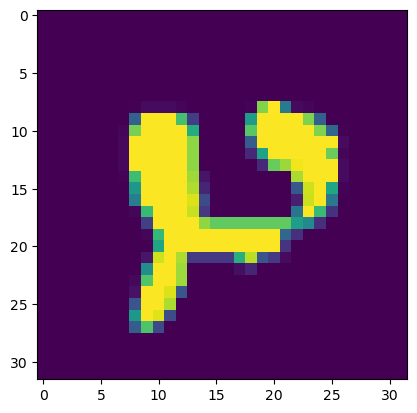

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt

# 假设你有一个 (60000, 28, 28) 的数据集
data = np.load(r'B:\dataset\Orientation_GS_dataset_unit8\rotated_MNIST\rotated_MNIST.npy')  # 示例数据

# 使用 np.pad 在每个图像周围添加 2 像素的 0 填充
padded_data = np.pad(data, ((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)

print("原始数据形状：", data.shape)
print("填充后数据形状：", padded_data.shape)

np.save(r'B:\dataset\Orientation_GS_dataset_unit8\rotated_MNIST\rotated_MNIST_padded.npy', padded_data)
plt.imshow(padded_data[1551])
plt.show()

In [1]:
!pip install albumentations

     ---------------------------------------- 0.0/171.7 kB ? eta -:--:--
     ------------------------------------- 171.7/171.7 kB 10.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     - -------------------------------------- 0.6/12.9 MB 13.3 MB/s eta 0:00:01
     ---- ----------------------------------- 1.5/12.9 MB 15.5 MB/s eta 0:00:01
     --------- ------------------------------ 3.1/12.9 MB 21.6 MB/s eta 0:00:01
     --------------- ------------------------ 5.1/12.9 MB 32.4 MB/s eta 0:00:01
     -------------------------- ------------- 8.5/12.9 MB 38.9 MB/s eta 0:00:01
     --------------------------------------  12.8/12.9 MB 72.6 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 59.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/423.9 kB ? eta -:--:--
     ------------------------------------- 423.9/423.9 kB 27.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/16.6 MB ? et

ERROR: Could not install packages due to an OSError: [WinError 5] アクセスが拒否されました。: 'C:\\Users\\nougata_share_pc_2\\anaconda3\\envs\\C-backup\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

